TensorFlow: 2.20.0
CSV Loaded:


Unnamed: 0.1  Unnamed: 0                       filepaths            labels  \
0          3006        3006  train/BANDED BROADBILL/001.jpg  BANDED BROADBILL   
1          3007        3007  train/BANDED BROADBILL/002.jpg  BANDED BROADBILL   
2          3008        3008  train/BANDED BROADBILL/003.jpg  BANDED BROADBILL   
3          3009        3009  train/BANDED BROADBILL/004.jpg  BANDED BROADBILL   
4          3010        3010  train/BANDED BROADBILL/005.jpg  BANDED BROADBILL   

  data set  
0    train  
1    train  
2    train  
3    train  
4    train

Train: 322, Valid: 10, Test: 10
Classes → Index mapping: {'BANDED BROADBILL': 0, 'BIRD OF PARADISE': 1}
Datasets created successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 937ms/step - accuracy: 0.9006 - loss: 0.2728 - val_accuracy: 1.0000 - val_loss: 7.6622e-04
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 823ms/step - accuracy: 0.9814 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 9.1150e-05
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 875ms/step - accuracy: 0.9969 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 5.8442e-05
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 3.0897e-05
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 2.3650e-05
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 1.9204e-05
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.1039e-05
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 888ms/step - accuracy: 0.9969 - loss: 0.

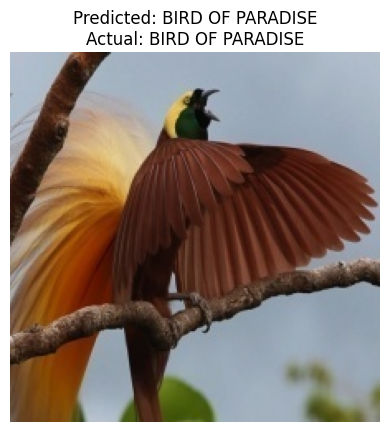

In [4]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

print("TensorFlow:", tf.__version__)

# ============================================
# 2. LOAD CSV FILE
# ============================================
df = pd.read_csv("labels.csv")   # CSV with columns: filepaths, labels, data set

print("CSV Loaded:")
display(df.head())

# ============================================
# 3. SPLIT DATA BY 'data set' COLUMN
# ============================================
train_df = df[df["data set"] == "train"]
valid_df = df[df["data set"] == "valid"]
test_df  = df[df["data set"] == "test"]

print(f"Train: {len(train_df)}, Valid: {len(valid_df)}, Test: {len(test_df)}")

# ============================================
# 4. LABEL ENCODING
# ============================================
class_names = sorted(df["labels"].unique().tolist())
num_classes = len(class_names)

class_to_idx = {name: i for i, name in enumerate(class_names)}
idx_to_class = {v: k for k, v in class_to_idx.items()}

print("Classes → Index mapping:", class_to_idx)

# ============================================
# 5. TF DATASET LOADER (FROM CSV PATHS)
# ============================================
img_size = (224, 224)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)
    img = img / 255.0
    return img, label

def df_to_dataset(dataframe, shuffle=True):
    paths = dataframe["filepaths"].values
    labels = dataframe["labels"].map(class_to_idx).values
    labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    return ds.batch(32).prefetch(tf.data.AUTOTUNE)

train_ds = df_to_dataset(train_df)
valid_ds = df_to_dataset(valid_df, shuffle=False)
test_ds  = df_to_dataset(test_df, shuffle=False)

print("Datasets created successfully!")

# ============================================
# 6. BUILD TRANSFER LEARNING MODEL (MobileNetV2)
# ============================================
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # freeze pretrained layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ============================================
# 7. TRAIN THE MODEL
# ============================================
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10
)

# ============================================
# 8. TEST ACCURACY
# ============================================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ============================================
# 9. PREDICT A RANDOM TEST IMAGE
# ============================================
random_row = test_df.sample(1).iloc[0]
img_path = random_row["filepaths"]

print("Random Image:", img_path)

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_label = idx_to_class[np.argmax(pred)]

print("Actual Label   :", random_row["labels"])
print("Predicted Label:", pred_label)

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {pred_label}\nActual: {random_row['labels']}")
plt.axis("off")
plt.show()
